# Анализ клиентов регионального банка и сегментация пользователей по количеству потребляемых продуктов

Датасет содержит данные о клиентах банка. Банк располагается в трех городах.

Для исследования были использованы следующие данные:  идентификатор пользователя, баллы кредитного скоринга, город, пол, возраст, количество объектов в собственности, баланс на счёте, количество продуктов, которыми пользуется клиент, есть ли кредитная карта, активный клиент, заработная плата клиента, ушёл или нет.

В проекте проанализированы клиенты банка и сегментированы по количеству потребляемых продуктов, проведен исследовательский анализ данных, сформулированы и проверены статистические гипотезы, проверена гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

**В результате исследования выявлено: как клиенты пользуются продуктом, какие характеристики клиента влияют на отток, портрет клиентов, которые чаще уходят, взаимосвязь дохода и кол-ва банковских продуктов.**



## Материалы
- [Презентация] (https://disk.yandex.ru/i/Lq1Hedbuu2KtHQ)
- [Дашборд] (https://public.tableau.com/app/profile/irina7423/viz/Book1_16284291638560/Dashboard1?publish=yes)

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

bank = pd.read_csv('/datasets/bank_dataset.csv')
display(bank.head())
bank.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [2]:
#True = 1, False = 0

bank.query('Churn == True').head(1)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1


In [3]:
print(bank['City'].value_counts())
print()
print(bank['Objects'].value_counts())
print()
print(bank['Products'].value_counts())
print()
print(bank['score'].min())
bank['score'].max()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: City, dtype: int64

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Objects, dtype: int64

1    5084
2    4590
3     266
4      60
Name: Products, dtype: int64

350


850

## Предобработка данных

In [4]:
bank = bank.drop_duplicates()

bank.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


## Исследовательский анализ данных

In [5]:
bank.drop(['userid'], axis=1).describe()

,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Кредитный рейтинг, или скоринговый балл, — это оценка благонадежности и кредитоспособности заемщика на основании информации из кредитной истории. Чем выше балл, тем более благонадежным считается клиент.

### Сегментация по оттоку

In [6]:
bank.drop(['userid'], axis=1).groupby('Churn').mean()

,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary
Churn,,,,,,,,
0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


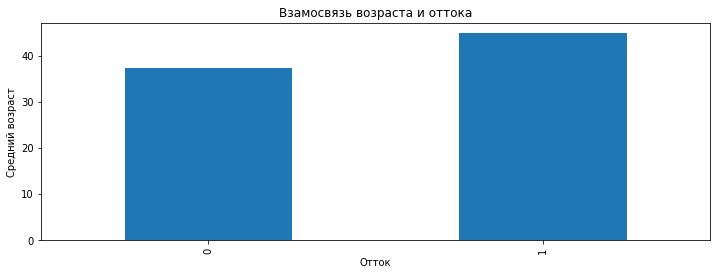

In [7]:
abc = bank.drop(['userid'], axis=1).groupby('Churn').mean().reset_index()
abc['Age'].plot(kind='bar', figsize=(12,4)).set_title('Взамосвязь возраста и оттока') 
plt.xlabel('Отток') 
plt.ylabel('Средний возраст') 
plt.show()

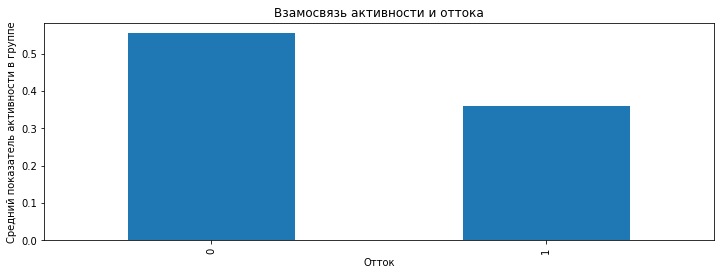

In [8]:
abc['Loyalty'].plot(kind='bar', figsize=(12,4)).set_title('Взамосвязь активности и оттока') 
plt.xlabel('Отток') 
plt.ylabel('Средний показатель активности в группе') 
plt.show()

<div class="alert alert-info"> <b> </b> 
Средние показатели двух групп выявляют различия в хар-ках "Активный клиент", "возраст".
В группе "ушедших клиентов" меньше активных клиентов, средний возраст старше.
         
</div>

In [9]:
bank.query('Churn == 1').drop(['userid'], axis=1).describe() #Клиенты, к-е ушли

,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,2037.000000,2037.000000,2037.000000,1537.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,30555.192802,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,103700.690000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,119948.090000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,137986.580000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [10]:
bank.query('Churn == 0').drop(['userid'], axis=1).describe() #Клиенты, к-е НЕ ушли

,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,7963.000000,7963.000000,7963.000000,4846.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,29944.927372,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,14262.800000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,99118.230000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,119791.215000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,139747.397500,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


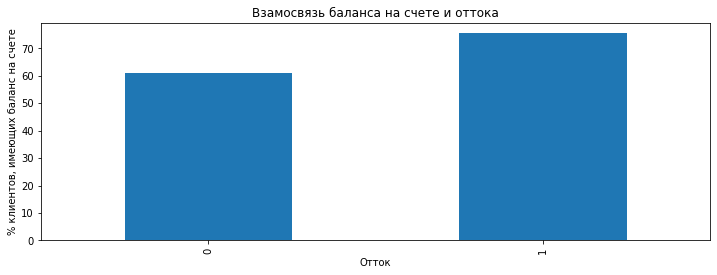

In [11]:
((bank.groupby('Churn')['Balance'].count()/bank.groupby('Churn')['Age'].count())*100).plot(kind='bar', figsize=(12,4)).set_title('Взамосвязь баланса на счете и оттока') 
plt.xlabel('Отток') 
plt.ylabel('% клиентов, имеющих баланс на счете') 
plt.show()

<div class="alert alert-info"> <b> </b> 
В группе "ушедших клиентов" кол-во клиентов у которых баланс на счете 75%, в группе "НЕ ушли" - 61%. Имеет смысл задуматься об условиях обслуживания счета, карт. Возможно, другие банки предлагают лучшие условия обслуживания.
         
</div>

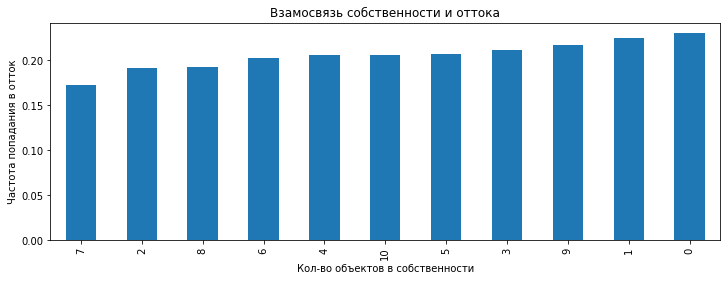

In [12]:
bank.groupby('Objects')['Churn'].mean().sort_values().plot(kind='bar', figsize=(12,4)).set_title('Взамосвязь собственности и оттока') 
plt.xlabel('Кол-во объектов в собственности') 
plt.ylabel('Частота попадания в отток') 
plt.show()

<div class="alert alert-info"> <b> </b> 
Чаще всего уходят клиенты с 0 и 1 объектом в собственности.
С двумя объектами клиенты реже попадают в отток.    
         
</div>

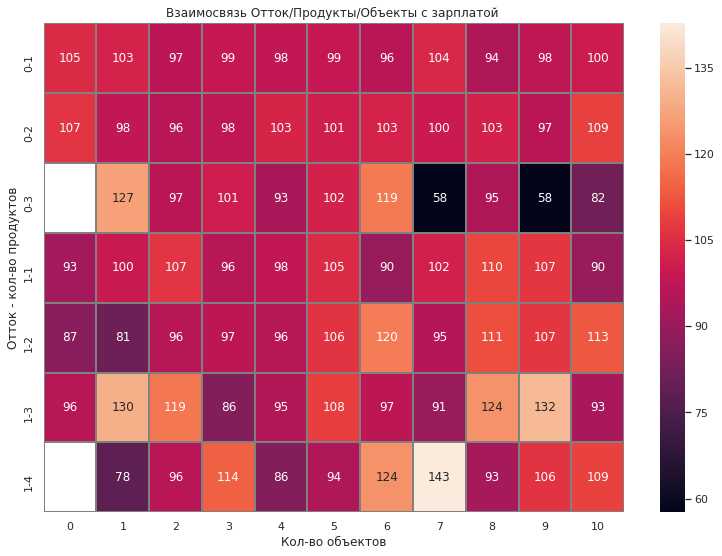

In [13]:
bank['salary']=round(bank['estimated_salary']/1000, 0)
bank_pivot = bank.pivot_table(
    index=['Churn', 'Products'], columns='Objects', values='salary', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Взаимосвязь Отток/Продукты/Объекты с зарплатой ')
sns.heatmap(bank_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.xlabel("Кол-во объектов") 
plt.ylabel("Отток - кол-во продуктов"); 

<div class="alert alert-info"> <b> </b> 
Все кто пользуются четырьмя продуктами уходят из банка.

Нет клиентов пользующихся 3-4 продуктами, у к-х нет собственности.
         
</div>

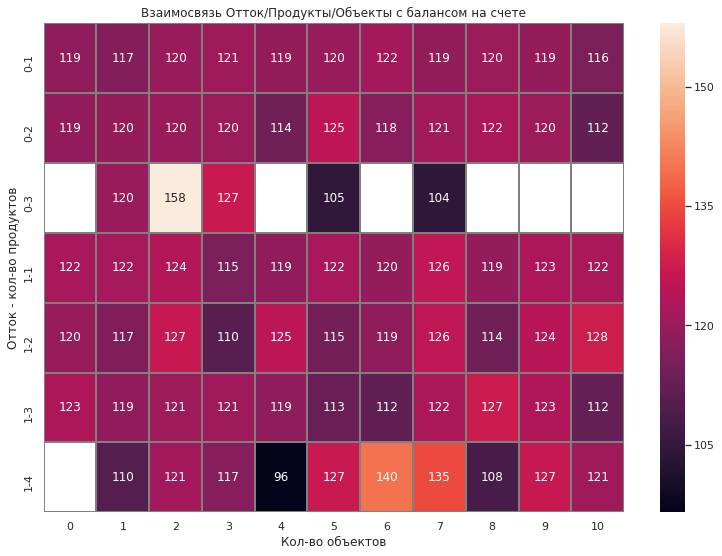

In [14]:
bank['balance']=round(bank['Balance']/1000, 0)
bank_pivot = bank.pivot_table(
    index=['Churn', 'Products'], columns='Objects', values='balance', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Взаимосвязь Отток/Продукты/Объекты с балансом на счете')
sns.heatmap(bank_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.xlabel("Кол-во объектов") 
plt.ylabel("Отток - кол-во продуктов"); 

<div class="alert alert-info"> <b> </b> 
Большая часть клиентов не попавших в отток и пользующаяся 3 продуктами не имеет счета или баланса на счете
         
</div>

In [15]:
bank.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn',
       'salary', 'balance'],
      dtype='object')

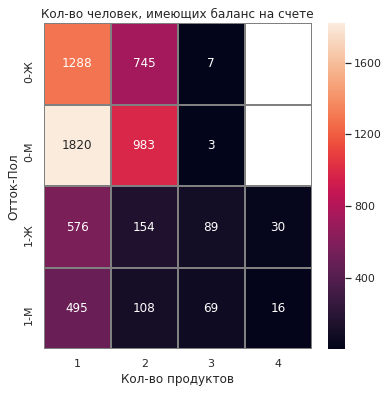

In [16]:

bank_pivot = bank.pivot_table(
    index=['Churn', 'Gender'], columns='Products', values='Balance', aggfunc='count'
)

sns.set(style='white')
plt.figure(figsize=(6, 6))
plt.title('Кол-во человек, имеющих баланс на счете')
sns.heatmap(bank_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.xlabel('Кол-во продуктов') 
plt.ylabel('Отток-Пол'); 

<div class="alert alert-info"> <b> </b> 
Чем больше кол-во продуктов у клиента, тем ниже вероятность наличия баланса на счете.

      
</div>

In [17]:
bank.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn',
       'salary', 'balance'],
      dtype='object')

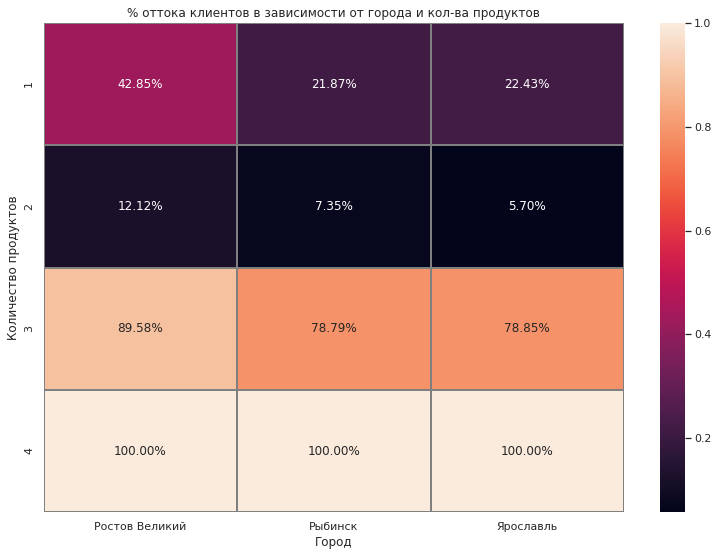

In [18]:

bank_pivot = bank.pivot_table(
    index='Products', columns='City', values='Churn', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('% оттока клиентов в зависимости от города и кол-ва продуктов')
sns.heatmap(bank_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray')
plt.xlabel('Город') 
plt.ylabel('Количество продуктов'); 

<div class="alert alert-info"> <b> </b> 
В Ростове показатели по оттоку хуже значительнее по каждой группе. Отток в группах 1 и 2  в 1,5 раза выше средних показателей по всем городам.
       
</div>

In [19]:
bank.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn,salary,balance
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,101.0,NaN
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,113.0,84.0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,114.0,160.0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,94.0,NaN
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,79.0,126.0


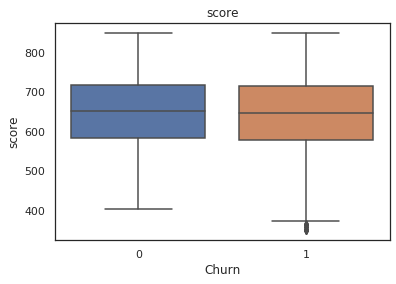

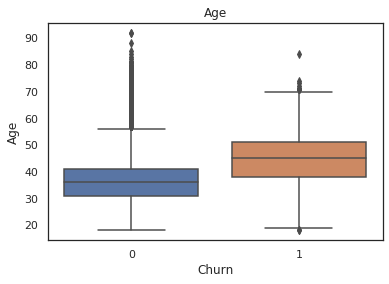

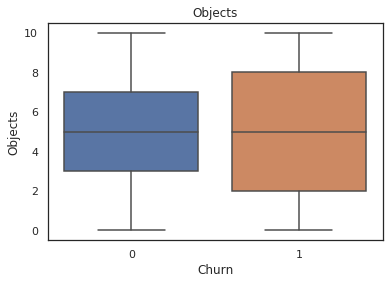

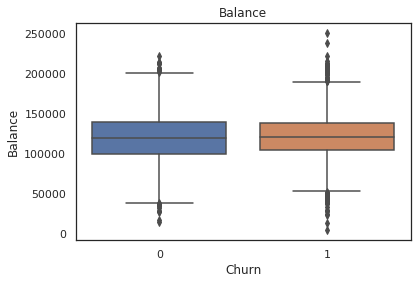

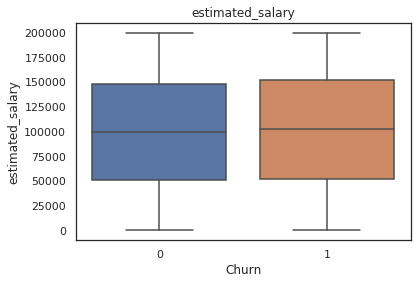

In [20]:
for i in ['score', 'Age', 'Objects', 'Balance', 'estimated_salary']:
    sns.boxplot(x='Churn',y=i, data=bank).set_title(i)
    plt.show() 

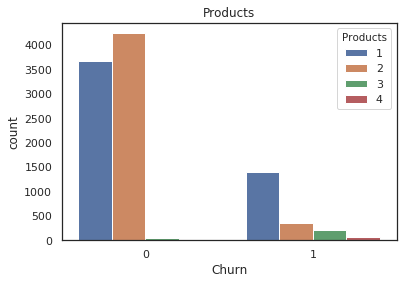

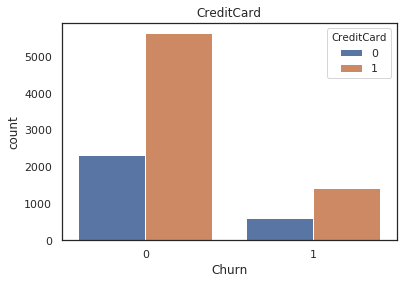

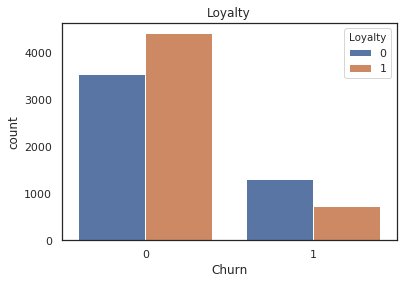

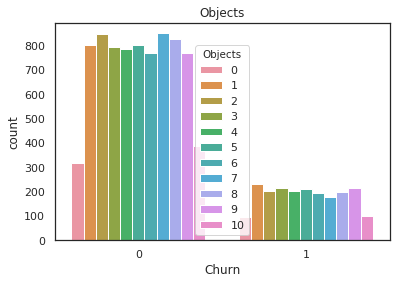

In [21]:
for i in ['Products', 'CreditCard', 'Loyalty', 'Objects']:
    sns.countplot(x="Churn", hue=i, data=bank).set_title(i)
    plt.show()

In [22]:
bank.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn',
       'salary', 'balance'],
      dtype='object')

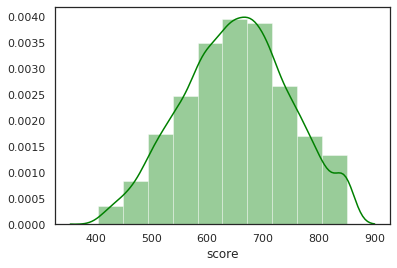

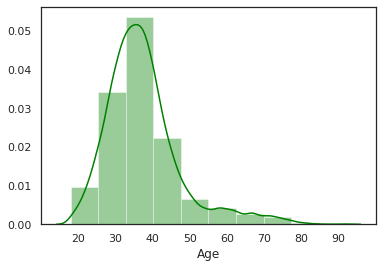

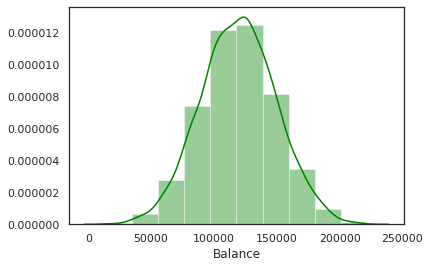

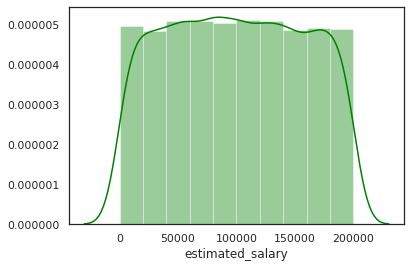

In [23]:
for i in ['score', 'Age', 'Balance', 'estimated_salary']:
    sns.distplot(bank.query('Churn == 0')[i], bins=10, color = 'green')    
    plt.show() 

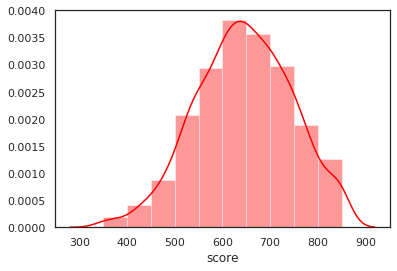

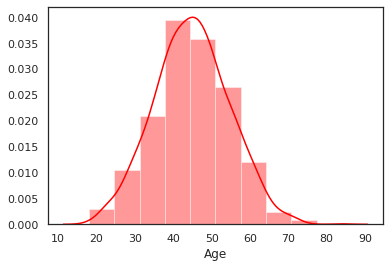

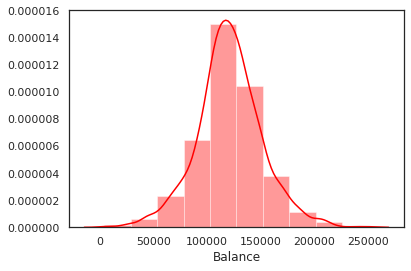

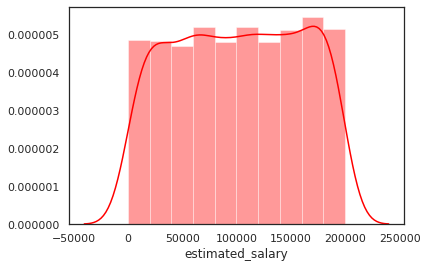

In [24]:
for i in ['score', 'Age', 'Balance', 'estimated_salary']:
    sns.distplot(bank.query('Churn == 1')[i], bins=10, color = 'red')
    plt.show() 

<div class="alert alert-info"> <b> </b>
    
**Проанализировав характеристики двух групп, можно сделать следующие выводы:**


1. В группе "ушедших клиентов" меньше активных клиентов, средний возраст старше, средний баланс больше.
    
2. Возраст сильнее всего влияет на отток, возможно стоит рассмотреть "консервативные" программы обслуживания для людей старшего возраста. Может быть программы банка ориентированы на более молодую аудиторию.
         
2. В группе "ушедших клиентов" кол-во клиентов у которых баланс на счете > 0 больше. Имеет смысл задуматься об условиях обслуживания счета, карт. Возможно, другие банки предлагают лучшие условия обслуживания.
    
3. В группе "ушедших клиентов" превалирует один продукт на человека. Есть смысл предлагать клиентам, пользующимся только одним продуктом, дополнительные банк.услуги на какой-то период бесплатно.  
    
</div>

### Матрица корреляции признаков

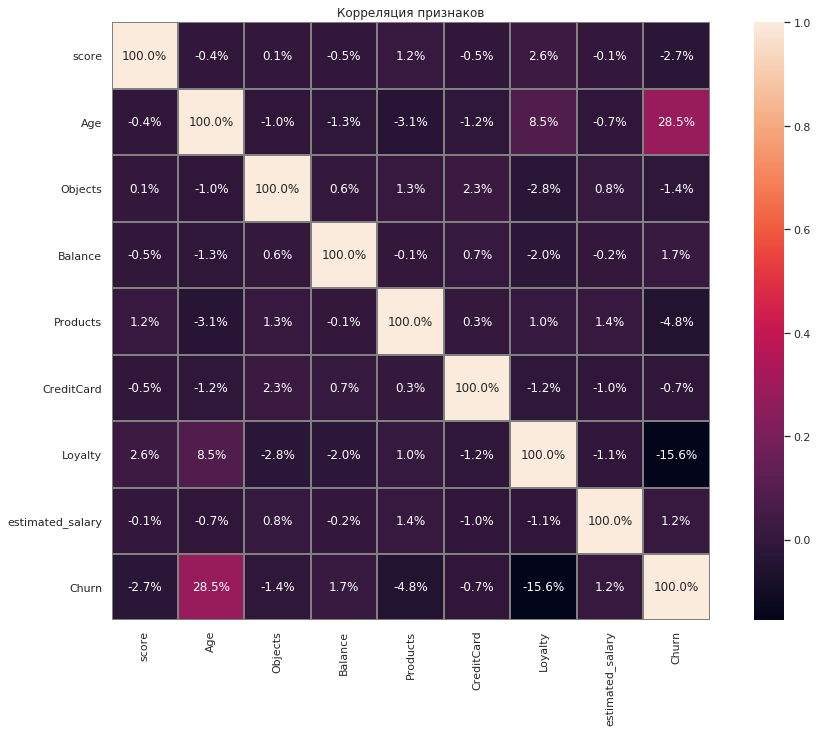

In [25]:
cm = bank.drop(['userid', 'salary', 'balance'], axis=1).corr() 

sns.set(style='white')
plt.figure(figsize=(16, 11))
plt.title('Корреляция признаков')
sns.heatmap(cm, annot = True, square=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

<div class="alert alert-info"> <b> </b> 
Сильнее всего на отток влияет возраст и активность.
    
Чем старше, чем вероятнее отток.
Активные клиенты редко уходят из банка.
         
</div>

### Сегментация по кол-ву продуктов

In [26]:
bank.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn',
       'salary', 'balance'],
      dtype='object')

Text(0, 0.5, 'Кол-во клиентов')

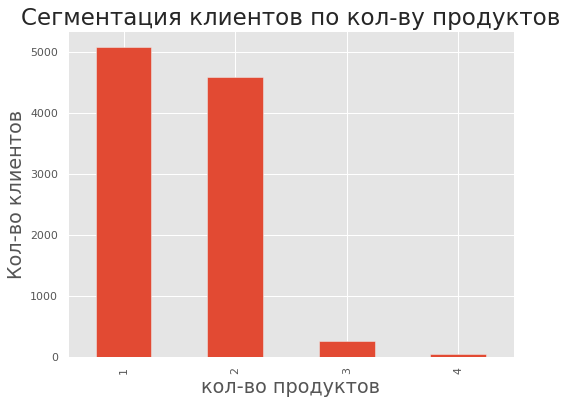

In [27]:
plt.style.use('ggplot')

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,6)

bank.groupby('Products')['Age'].count().plot(kind='bar').set_title('Сегментация клиентов по кол-ву продуктов')
plt.xlabel('кол-во продуктов') 
plt.ylabel('Кол-во клиентов')


<div class="alert alert-info"> <b> </b> 
Основная часть клиентов пользуется 1-2 продуктами.
         
</div>

In [28]:
bank.drop(['userid', 'salary', 'balance'], axis=1).groupby('Products').mean()

,score,Age,Objects,Balance,CreditCard,Loyalty,estimated_salary,Churn
Products,,,,,,,,
1,649.120968,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144
2,652.188671,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817
3,648.105263,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068
4,653.583333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000


<div class="alert alert-info"> <b> </b> 
Реже всего уходят клиенты с 2 продуктами, чаще - с 3-4 продуктами.
         
</div>

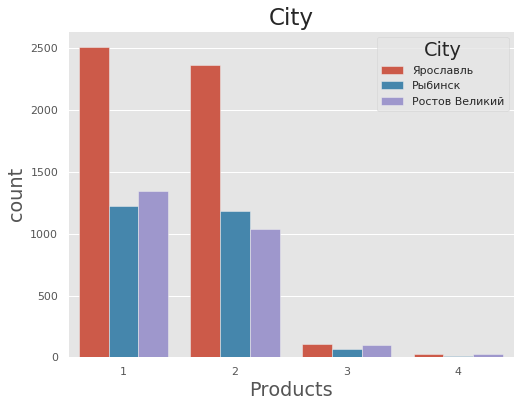

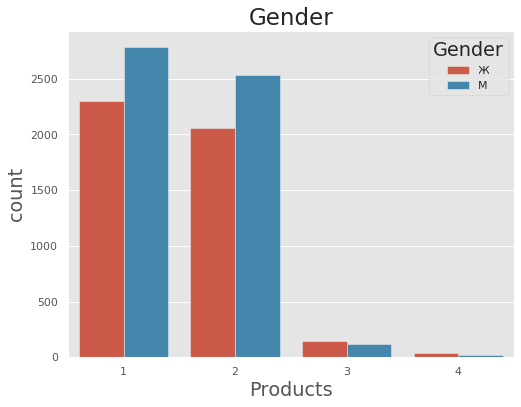

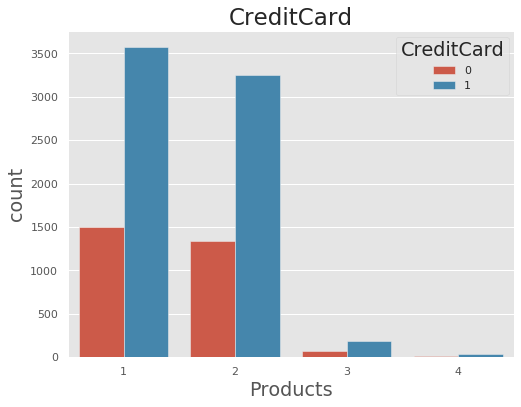

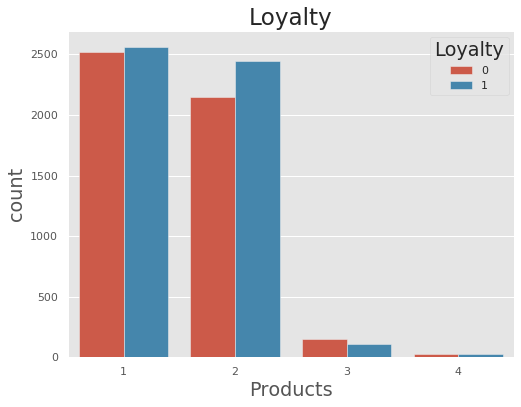

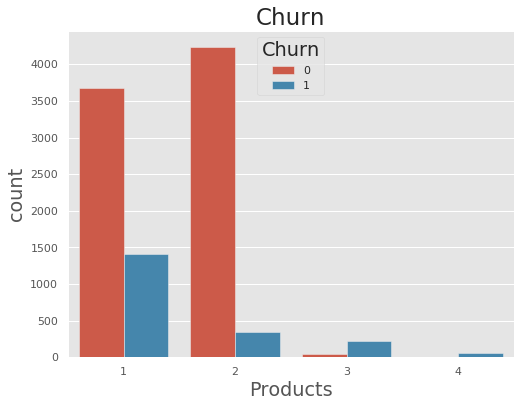

In [29]:
for i in ['City', 'Gender', 'CreditCard', 'Loyalty', 'Churn']:
    sns.countplot(x='Products', hue=i, data=bank).set_title(i)
    plt.show()

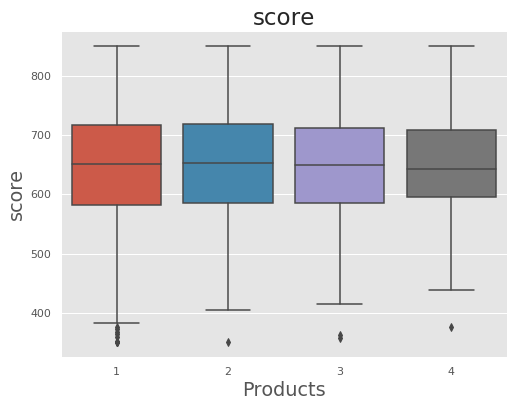

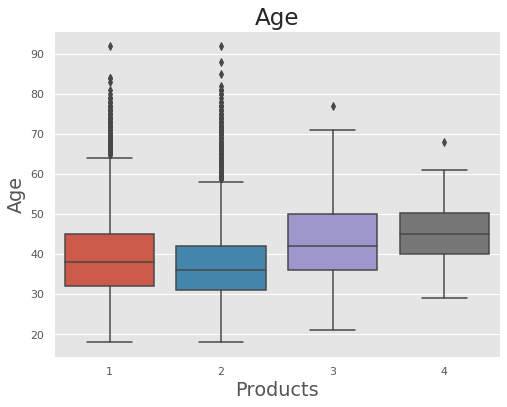

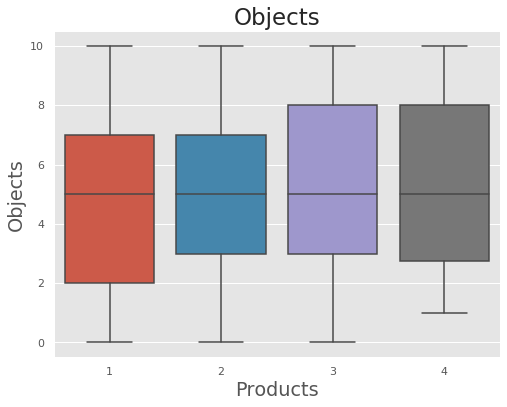

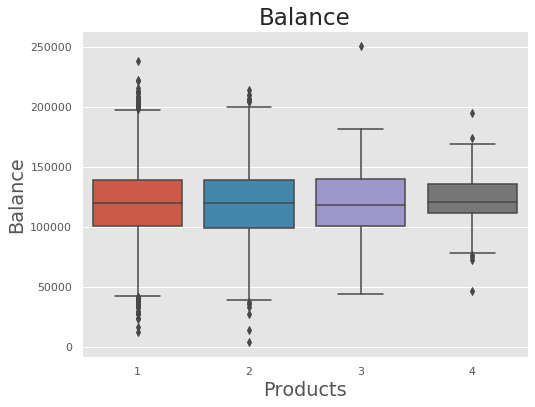

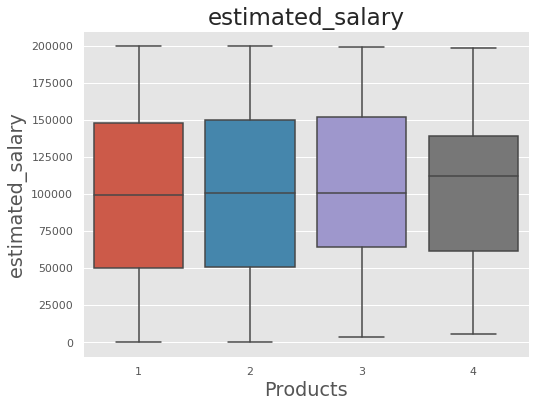

In [30]:
for i in ['score', 'Age', 'Objects', 'Balance', 'estimated_salary']:
    sns.boxplot(x='Products',y=i, data=bank).set_title(i)
    plt.show() 

In [31]:
bank.drop(['userid'], axis=1).groupby('Products').mean()

,score,Age,Objects,Balance,CreditCard,Loyalty,estimated_salary,Churn,salary,balance
Products,,,,,,,,,,
1,649.120968,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144,99.492526,119.897822
2,652.188671,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817,100.451416,119.670352
3,648.105263,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068,104.334586,119.470238
4,653.583333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000,104.750000,122.217391


<div class="alert alert-info"> <b> </b>
    
**Сегментация по кол-ву продуктов показывает, как клиенты пользуются нашими услугами:**


1. Реже всего уходят из банка те кто пользуются 2 продуктами, чаще - пользователи 3-х и 4-х продуктов.

2. Самые молодые клиенты пользуются двумя продуктами, а самые взрослые - 3 и 4 продуктами банка
    
3. Кол-во банковских продуктов прямо пропорционально кол-ву объектов недвижимости у клиента. Чем больше объектов, тем больше продуктов.    

4. Самый низкий баланс на счете у клиентв № 2, высокий у пользователей одним и четырьмя продуктами.
    
5. Зарплата прямопропорциональна кол-ву продуктов, но разница м/у средней зарплатой незначительная. 
    
**Самое значительное различие м/у группами по продуктам в оттоке**    
    
</div>

## Проверка гипотез

### Гипотеза № 1

Сформулировать и проверить гипотезу – «О равенстве среднего дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

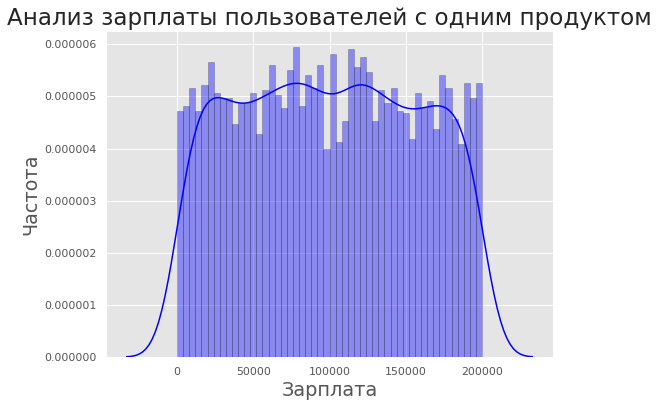

In [32]:
sns.distplot(bank.query('Products == 1')['estimated_salary'], hist=True, 
             bins=50, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей с одним продуктом')

plt.xlabel("Зарплата") 
plt.ylabel("Частота"); 

In [33]:
alpha = 0.05  

results = sps.shapiro(bank.query('Products == 1')['estimated_salary'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  3.017243029368968e-36
Отвергаем нулевую гипотезу: распределение не нормально


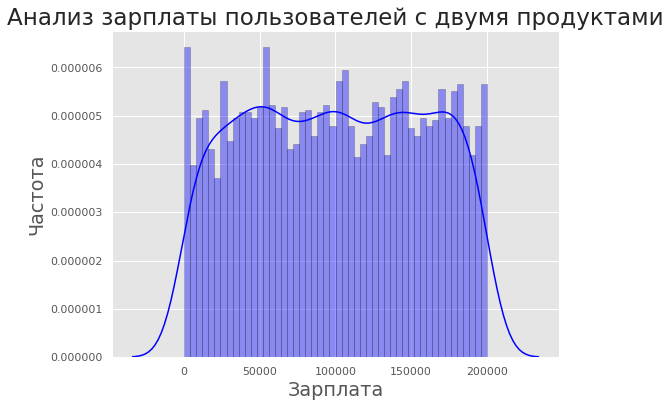

In [34]:
sns.distplot(bank.query('Products == 2')['estimated_salary'], hist=True, 
             bins=50, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей с двумя продуктами')

plt.xlabel("Зарплата") 
plt.ylabel("Частота"); 

In [35]:
alpha = 0.05  

results = sps.shapiro(bank.query('Products == 2')['estimated_salary'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  2.1702207154579243e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [36]:
bank.query('Products < 3').groupby('Products')['estimated_salary'].mean()

Products
1     99487.256851
2    100452.012821
Name: estimated_salary, dtype: float64

<div class="alert alert-info">
<b>Средний доход клиентов с одним продуктом и с двумя равны 99 487 руб. и 100 452 руб.  </b>
   
- Пусть нулевая гипотеза звучит так - разница среднего дохода группы 1 и 2 НЕ является статистически значимой
    
- Альтернативная  - разница среднего дохода группы 1 и 2 является статистически значимой  
   
</div>

In [37]:
alpha = 0.05  

results = sps.mannwhitneyu(bank.query('Products == 1')['estimated_salary'], bank.query('Products == 2')['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.20397833259638254
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


<div class="alert alert-info">
<b> </b>  
Статистически значимых различий в среднем доходе нет.
P-value значительно больше 0.05. 
    
Значит, причин отвергать нулевую гипотезу и считать, что в среднем доходе есть различия, нет.    


</div>

### Гипотеза № 2

In [38]:
print(bank.query('Products > 2')['estimated_salary'].mean())
bank.query('Products < 3')['estimated_salary'].mean()

104400.1415030675


99945.00234442836

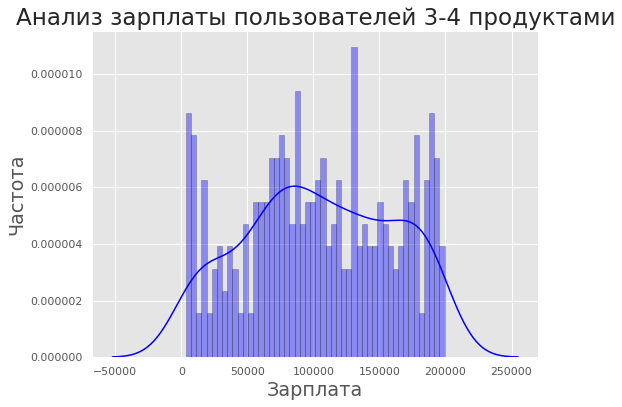

In [39]:
sns.distplot(bank.query('Products > 2')['estimated_salary'], hist=True, 
             bins=50, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей 3-4 продуктами')

plt.xlabel("Зарплата") 
plt.ylabel("Частота");

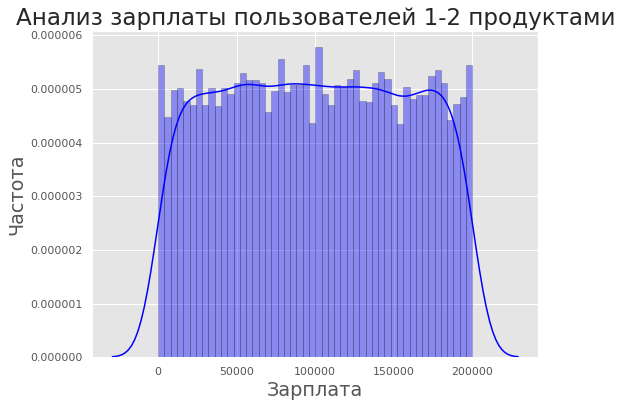

In [40]:
sns.distplot(bank.query('Products < 3')['estimated_salary'], hist=True, 
             bins=50, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей 1-2 продуктами')

plt.xlabel("Зарплата") 
plt.ylabel("Частота");

<div class="alert alert-info">
<b>Средний доход клиентов с 3-4 продуктами и с 1-2 равны 104 400 руб. и 99 900 руб. соответственно </b>
   
- Пусть нулевая гипотеза звучит так - разница среднего дохода группы 1 и 2 НЕ является статистически значимой
    
- Альтернативная  - разница среднего дохода группы 1 и 2 является статистически значимой  
   
</div>

In [41]:
alpha = 0.05  

results = sps.mannwhitneyu(bank.query('Products > 2')['estimated_salary'], bank.query('Products < 3')['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.08384672275567784
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


<div class="alert alert-info">
<b> </b>  
Статистически значимых различий в среднем доходе нет.
P-value больше 0.05. 
    
Значит, причин отвергать нулевую гипотезу и считать, что в среднем доходе есть различия, нет.    


</div>

## Выводы

<div class="alert alert-info"> <b> </b> 
    
**Проанализировав характеристики двух групп по оттоку, можно сделать следующие выводы:**


1. В группе "ушедших клиентов" меньше активных клиентов, средний возраст старше, средний баланс больше.
    
2. Возраст сильнее всего влияет на отток, возможно стоит рассмотреть "консервативные" программы обслуживания для людей старшего возраста. Может быть программы банка ориентированы на более молодую аудиторию.
         
2. В группе "ушедших клиентов" кол-во клиентов у которых баланс на счете 75%, в группе "НЕ ушли" - 61%. Имеет смысл задуматься об условиях обслуживания счета, карт. Возможно, другие банки предлагают лучшие условия обслуживания. 
    
3. В группе "ушедших клиентов" превалирует один продукт на человека. Есть смысл предлагать клиентам, пользующимся только одним продуктом, дополнительные банк.услуги на какой-то период бесплатно.  
    
4. Активные клиенты реже уходят из банка. 
    
5. Реже всего уходят из банка те, кто пользуются 2 продуктами, чаще - пользователи 3-х и 4-х продуктов.  

6. Все кто пользуются четырьмя продуктами уходят из банка.
    
7. В Ростове показатели по оттоку хуже значительнее по каждой группе. Отток в группах 1 и 2  в 1,5 раза выше средних показатей по всем городам. 
    
  
    
**Сегментация по кол-ву продуктов показывает, как клиенты пользуются нашими услугами:**
    
**Основная часть клиентов пользуется 1-2 продуктами.** 

1. Большая часть клиентов не попавших в отток и пользующаяся 3 продуктами не имеет счета или баланса на счете.

2. Самые молодые клиенты пользуются двумя продуктами, а самые взрослые - 3 и 4 продуктами банка
    
3. Кол-во банковских продуктов прямо пропорционально кол-ву объектов недвижимости у клиента. Чем больше объектов, тем больше продуктов.    

4. Самый низкий баланс на счете у клиентов № 2, высокий у пользователей одним и четырьмя продуктами.
    
5. Зарплата прямопропорциональна кол-ву продуктов, но разница м/у средней зарплатой незначительная. 
    
6. Нет клиентов пользующихся 3-4 продуктами, у к-х нет собственности. 
    
7.  Чем больше кол-во продуктов у клиента, тем ниже вероятность наличия баланса на счете.
    
8. Клиенты, пользующиеся четырьмя продуктами и не имеющие баланс на счете, не попадают в отток. 
    

**Средний доход клиентов с одним продуктом и с двумя равны 99 487 руб. и 100 452 руб.**  
Статистически значимых различий в среднем доходе нет.
P-value значительно больше 0.05. 
    
Значит, причин отвергать нулевую гипотезу и считать, что в среднем доходе есть различия, нет.        
    
</div>